# Disseration Experiment 3g
# Generate SHAP XAI Output (Credit Card Fraud) 
# - Experiment January 6¶
Ciaran Finnegan January 2023

# Import Libraries + Custom Functions

## Import Libraries

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [2]:
# Import libs
import numpy as np
import pandas as pd

# Import SHAP libraries
import shap

# Import Display libraries
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable
import raiutils
from raiutils.exceptions import UserConfigValidationException

# Import libraries to build ANN model
import tensorflow as tf
import keras_tuner as kt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam


# Import ML Workflow Libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import sklearn.metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.utils import resample


# Classifier training (not used for explainability)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

#Import libraries for explainer metrics
from sklearn.cluster import KMeans
from scipy.spatial import distance


# Additional display libraires
import contextlib
import os
import sys
from contextlib import contextmanager


# Libraries used in Experiment Creation of XL Output Metrics
import os
import time
import random
import openpyxl

2024-01-06 18:02:41.930879: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-06 18:02:41.933310: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-06 18:02:41.981693: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-06 18:02:41.983163: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-06 18:02:42.769194: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

## Custom Functions

Dataset Visualisations

In [3]:
%run ./DS_Visualisation_Functions.ipynb

Metrics

In [4]:
%run ./XAI_Metrics_Functions.ipynb

Function 'example_function' executed in 2.0021 seconds
Result: Result, Execution Time: 2.0021064281463623 seconds


Model Evaluation Functions

In [5]:
%run ./DS_Model_Build_Evaluation_Functions.ipynb

Track Experiment Result Functions

In [6]:
%run ./XAI_Experiment_Functions.ipynb

# Load Model

A Neural Network Model has been created in another Kubeflow Notebook and is being used in all the XAI experiments

In [7]:
loaded_model = keras.models.load_model('ccfraud_model')  # If saved as SavedModel

In [8]:
X_test_loaded, y_test_loaded, X_train_loaded, df_downsampled_loaded, dfCatCols = load_CC_train_test_data()

In [9]:
X_train_loaded.head(1)

,OnlinePOSCount.cnt.day.present,EMVTransactionsCount.cnt.day.present,NonEMVTransactionsCount.cnt.day.present,MerchantCategory,POS_Count.cnt.day.present,PinIndicator,DomesticAuthCount.cnt.hour1,DomesticAuthCount.cnt.hour3,DomesticAuthCount.cnt.hour4,DomesticAuthCount.cnt.hour10,...,TxnChannelCode_OnL,TxnChannelCode_POS,CustomerPresentIndicator_N,CustomerPresentIndicator_U,CustomerPresentIndicator_Y,DvcPosEntryMode_Card Present,DvcPosEntryMode_E-Commerce,DvcPosEntryMode_U,ECommerceFlag_U,ECommerceFlag_Y
0,2,2,0,5462,2,1,1,1,1,2,...,0,1,0,0,1,1,0,0,1,0


## Re-Display Model Peformance

For illustration, the evualtion metrics of the NN model will be repeated here.

### Tabular Data

In [10]:
scaler = StandardScaler()   
X_test_loaded_scaled = scaler.fit_transform(X_test_loaded)

In [11]:
y_pred_loaded = display_model_metrics_tabular(loaded_model, X_test_loaded_scaled, y_test_loaded)

42/42 [==============================] - 0s 1ms/step - loss: 0.3741 - accuracy: 0.8744


42/42 [==============================] - 0s 986us/step


Metric,Value
Accuracy,0.874429
ROC AUC Score,0.937547
Precision (Class 0),0.891680
Recall (Class 0),0.855422
F1-Score (Class 0),0.873174
Precision (Class 1),0.858198
Recall (Class 1),0.893846
F1-Score (Class 1),0.875659


Tablular Done!


### Confusion Matrix

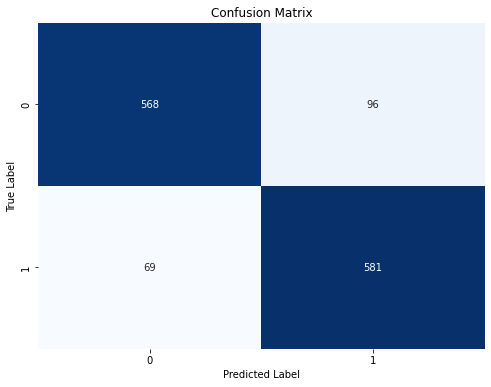

'Confusion Matrix!'

In [12]:
generate_confusion_matrix(y_test_loaded, y_pred_loaded)

-------------------------

# Generate Shap Values

## SHAP Summary Plot

In [13]:
# Create a SHAP explainer
# explainer = shap.KernelExplainer(model.predict, shap.sample(X_train_downsampled, 10)) #100

#Jan 6th - use new loaded model
explainer = shap.KernelExplainer(loaded_model.predict, shap.sample(X_train_loaded, 10)) #100

1/1 [==============================] - 0s 67ms/step


In [14]:
#X_train_loaded.head(1)

In [15]:
#df_downsampled_loaded.head(1)

In [16]:
# Extract the feature names, excluding the target variable 'Fraud'
#column_names = df_downsampled.drop('default', axis=1).columns

#Jan 6th - use new loaded data
column_names = df_downsampled_loaded.drop('Fraud', axis=1).columns

In [17]:
# Convert NumPy array to DataFrame
#X_test_downsampled = pd.DataFrame(X_test_downsampled, columns=column_names)
#Jan 6th - use new loaded data, which is already a dataframe

In [18]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    # Jan 6th - use new loaded test data, which is already a dataframe
    #shap_values = explainer.shap_values(X_test_downsampled.iloc[:5,:], silent=True) #100
    shap_values = explainer.shap_values(X_test_loaded.iloc[:10,:], silent=True) #100

680/680 [==============================] - 1s 927us/step


In [19]:
# Convert NumPy array to DataFrame
#Jan 6th - use new loaded data, which is already a dataframe
#X_train_downsampled = pd.DataFrame(X_train_downsampled, columns=column_names)

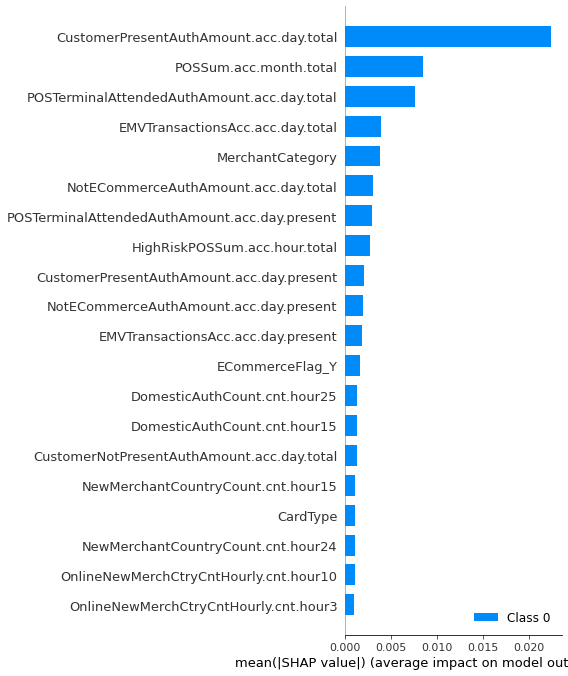

In [20]:
# Create a SHAP summary plot
#shap.summary_plot(shap_values, X_test_downsampled.iloc[:10,:], feature_names=X_train_downsampled.columns)

#Jan 6th - use new loaded data, which is already a dataframe
shap.summary_plot(shap_values, X_test_loaded.iloc[:10,:], feature_names=X_train_loaded.columns)

## Prepare nn SHAP Values Data for Metric Calculations

Use a custom built decorator to track the time taken to generate the SHAP values

In [21]:
@timeit
def generate_shap_explanations(model, data, target_column='Fraud', 
                                output_instance_file='instances2.csv', 
                                output_shap_file='shap_values2.csv'):
    # Drop the target column from the data
    data_features = data.drop(columns=[target_column])
    
    # Select a subset of the data for explanation (first 25 instances)
    instances_to_explain = data_features.iloc[:5, :]#25
    
    # Create a SHAP explainer
    explainer = shap.KernelExplainer(model.predict, shap.sample(data_features, 10)) #100
    
    # Generate SHAP values for the instances
    with warnings.catch_warnings():
        warnings.simplefilter('ignore')
        # Your code that produces warnings goes here
        shap_values = explainer.shap_values(instances_to_explain)
    
    # Convert the SHAP values to a DataFrame
    if isinstance(shap_values, list):
        # For multi-class models, average the SHAP values over all classes
        shap_values = np.mean(shap_values, axis=0)
    df_shap_values = pd.DataFrame(shap_values, columns=data_features.columns)
    
    # Output the SHAP values to a csv file
    df_shap_values.to_csv(output_shap_file, index=False)
    
    # Output the instances to a csv file
    instances_to_explain.to_csv(output_instance_file, index=False)
    
    return instances_to_explain, df_shap_values

In [22]:
# When calling the function, you get both the results and the execution time
# Call the function with the custome decorator for time measurement
#results, exec_time = generate_shap_explanations(loaded_model, df_encoded)

# Jan 6th - use loaded data
results, exec_time = generate_shap_explanations(loaded_model, df_downsampled_loaded)

1/1 [==============================] - 0s 17ms/step


  0%|          | 0/5 [00:00<?, ?it/s]

680/680 [==============================] - 1s 937us/step
Function 'generate_shap_explanations' executed in 5.7606 seconds


In [23]:
# Unpack the results to get df_instances and df_shap_values
df_instances, df_shap_values = results

In [24]:
print(f"Execution Time: {exec_time} seconds")

Execution Time: 5.7606120109558105 seconds


## Single Random Observation (for illustration)

In [25]:
# Select a random observation from the test dataset
#random_observation = X_test_downsampled.sample(1, random_state=42)

# Jan 6th - use loaded data
random_observation = X_test_loaded.sample(1, random_state=42)

In [26]:
# Generate SHAP values for the instances
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    # Your code that produces warnings goes here
    shap_values_random_observation = explainer.shap_values(random_observation)

  0%|          | 0/1 [00:00<?, ?it/s]

680/680 [==============================] - 1s 973us/step


In [27]:
# Get the SHAP values for class 1 (default) for this observation
shap_values_observation_class1 = shap_values_random_observation[0]

In [28]:
# Convert SHAP values to a Series for easier manipulation
shap_values_series = pd.Series(shap_values_observation_class1[0], index=random_observation.columns)

In [29]:
# Sort the features based on absolute SHAP value
sorted_features = shap_values_series.abs().sort_values(ascending=False)

In [30]:
# Display the top 20 features for the random observation in an aesthetically pleasing tabular format
top_20_features_observation = sorted_features.head(20)
top_20_features_df_observation = pd.DataFrame({'Feature': top_20_features_observation.index, 
                                               'SHAP Value': top_20_features_observation.values})

In [31]:
# Display the index (row number) of the selected observation
print(f"Selected Row Number from Test Data: {random_observation.index[0]}")

Selected Row Number from Test Data: 1232


In [32]:
# Display the SHAP values for the top 20 features of the observation
print("\nTop 20 Features and Their SHAP Values:")
display(HTML(xai_styles + top_20_features_df_observation.to_html(index=False)))


Top 20 Features and Their SHAP Values:


Feature,SHAP Value
CustomerPresentAuthAmount.acc.day.total,0.001693
MerchantCategory,0.001599
DomesticAuthCount.cnt.hour3,0.001534
POSTerminalAttendedAuthAmount.acc.day.total,0.001322
CustomerPresentAuthAmount.acc.day.present,0.001168
NotECommerceAuthAmount.acc.day.present,0.001104
POSSum.acc.month.total,0.001103
NonEMVTransactionsAcc.acc.day.present,0.001058
TxnChannelCode_OnL,0.001029
OnlineNewMerchCtryCntHourly.cnt.hour1,0.000983


## Prepare nn SHAP Values Data for Metric Calculations

Move code down into here...

# Generate XAI Metrics 

## Identity

#### Run a Basic Test First

In [33]:
# Select two random instances from the SHAP value dataframe
df_xai_numerical = df_shap_values

random_indices = np.random.choice(df_xai_numerical.index, size=2, replace=False)
instance_1 = df_xai_numerical.iloc[random_indices[0]]
instance_2 = df_xai_numerical.iloc[random_indices[1]]

# Compute the Euclidean distance between the selected instances - uses custom project function
distance = get_euclidean_distance(instance_1, instance_2)
print(f"Euclidean distance between instance {random_indices[0]} and instance {random_indices[1]}: {distance:.4f}")


Calculating Euclidean distance...


Euclidean distance between instance 0 and instance 2: 0.5379


#### Retrieve Identity Score

In [34]:
from scipy.spatial import distance

In [35]:
SHAP_Identity_Metric = get_identity_metric(df_instances, df_shap_values, "SHAP")

Instance 0:   Current matches: 0
	Closest feature instance: 4 (Distance: 31585.4986)
	Closest SHAP instance: {closest_xai_idx} (Distance: {xai_distances[closest_xai_idx]:.4f})
Instance 1:   Current matches: 1
	Closest feature instance: 2 (Distance: 492.0823)
	Closest SHAP instance: {closest_xai_idx} (Distance: {xai_distances[closest_xai_idx]:.4f})
Instance 2:   Current matches: 2
	Closest feature instance: 1 (Distance: 492.0823)
	Closest SHAP instance: {closest_xai_idx} (Distance: {xai_distances[closest_xai_idx]:.4f})
Instance 3:   Current matches: 3
	Closest feature instance: 1 (Distance: 642.7620)
	Closest SHAP instance: {closest_xai_idx} (Distance: {xai_distances[closest_xai_idx]:.4f})
Instance 4:   Current matches: 3
	Closest feature instance: 2 (Distance: 1283.7854)
	Closest SHAP instance: {closest_xai_idx} (Distance: {xai_distances[closest_xai_idx]:.4f})


This is the function in XAI_METRICS_FUNCTIONS -- IDENTITY for SHAP



Percentage of matches: 60.00%   3 Matches of 5 Entries


#### Display Identity Score Metric

In [36]:
SHAP_Identity_Number = "{:.2f}%".format(SHAP_Identity_Metric)

In [37]:
display_text("SHAP Identity Metric Score: " + SHAP_Identity_Number)

## Stability

### Invoke Stability Metric Function

#### Retrieve Stability Score

In [38]:
# SHAP_Stability_Metric = get_stability_metric_y(df_shap_values, y_test_downsampled, 'SHAP')

# Jan 6th - use loaded data
SHAP_Stability_Metric = get_stability_metric_y(df_shap_values, y_test_loaded, 'SHAP')

Number of Instances in Cluster '0': 0
Number of Instances in Cluster '1': 0

For Class '0':
Total Instances: 2
Matching Cluster '0' Instances: 0

For Class '1':
Total Instances: 3
Matching Cluster '1' Instances: 0


This is the function in XAI_METRICS_FUNCTIONS -- STABILITY -- SHAP



Percentage of matches: 0.00%   0.0 Matches of 5 Entries


#### Display Stability Score Metric

In [39]:
SHAP_Stability_Number = "{:.2f}%".format(SHAP_Stability_Metric)

In [40]:
display_text("SHAP Stability Metric Score: " + SHAP_Stability_Number)

## Seperability

### Invoke Seperability Metric Function

#### Retrieve Seperability Score

In [41]:
SHAP_Seperability_Metric = get_seperability_metric(df_instances, df_shap_values, "SHAP")

Failure
Failure
Failure
Failure


#### Display Seperability Score Metric

In [42]:
SHAP_Seperability_Number = "{:.2f}%".format(SHAP_Seperability_Metric)

In [43]:
display_text("SHAP Seperability Metric Score: " + SHAP_Seperability_Number)

## Similarity

### Invoke Similarity Metric Function

#### Retrieve Similarity Score

In [44]:
SHAP_Similarity_Metric = get_similarity_metric(df_instances, df_shap_values, "SHAP", use_dbscan=False)

#### Display Similarity Score Metric

In [45]:
SHAP_Similarity_Number = "{:6.2f}".format(SHAP_Similarity_Metric)

In [46]:
display_text("SHAP Similarity Metric Value: " + SHAP_Similarity_Number)